In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from src.utils.datasets.ggimages import OpenImage
from src.utils.datasets.transform import RandomHorizontalFlip, Resize, Compose, XyToCenter
import torchvision.transforms as transforms
from src.utils.display.images import imshow, result_show
from torch.utils.data import DataLoader
from src.utils.datasets.adapter import convert_data
import numpy as np
from src.network.yolo import Yolo
from src.config import VOC_ANCHORS
from src.utils.process_boxes import preprocess_true_boxes
from src.config import IOU_THRESHOLD, TENSORBOARD_PATH
from tensorboardX import SummaryWriter
from datetime import datetime
from src.utils.datasets.voc import VOCDetection
from src.utils.datasets.voc  import VOCMerge



general_transform = Compose([
    Resize((448, 448)),
    XyToCenter()
])


transform = transforms.Compose([
                transforms.ToTensor()])

In [3]:
batch_size = 1

root = '/data/data/'
ds = VOCMerge(root, 'train', dataset_name='VOC_FULL', transform=transform,  general_transform=general_transform)
print(len(ds))

train_data_loader = DataLoader(ds, batch_size=batch_size, shuffle=True, collate_fn=convert_data, num_workers=1, drop_last=True)

9143


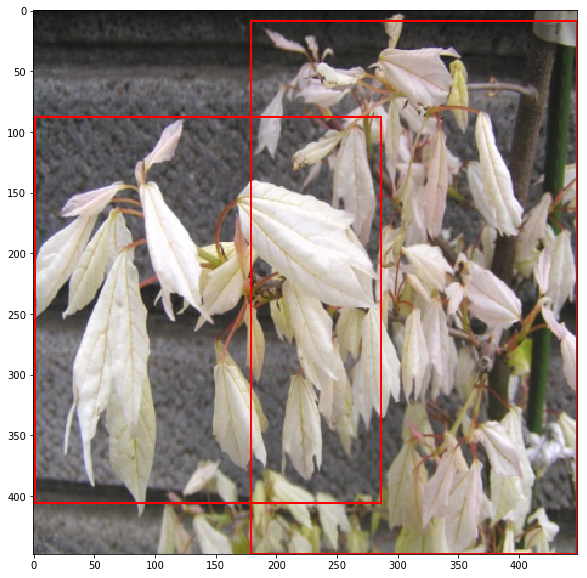

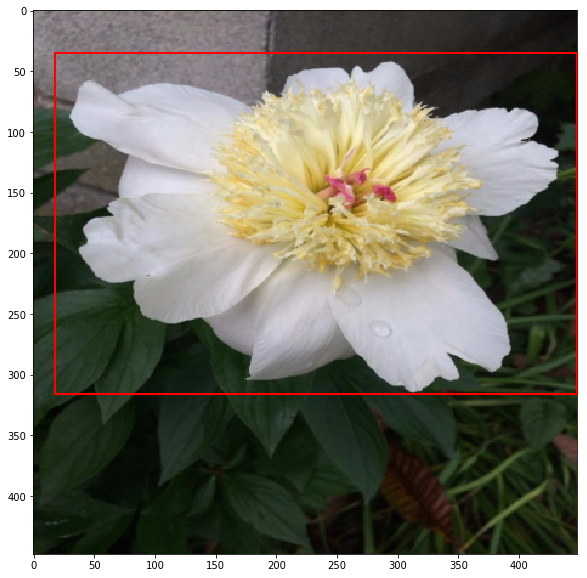

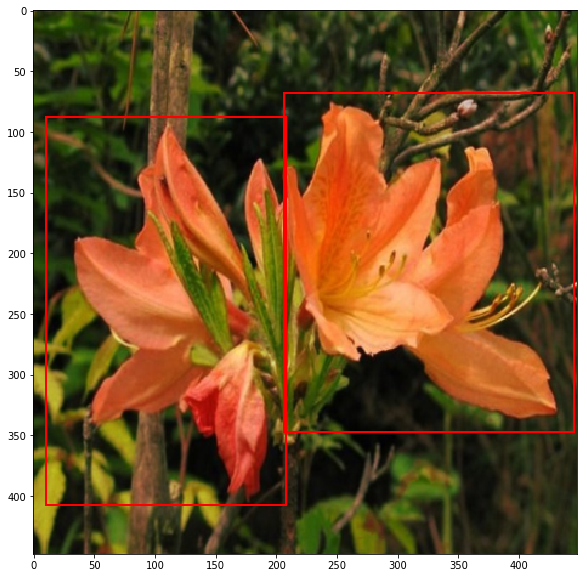

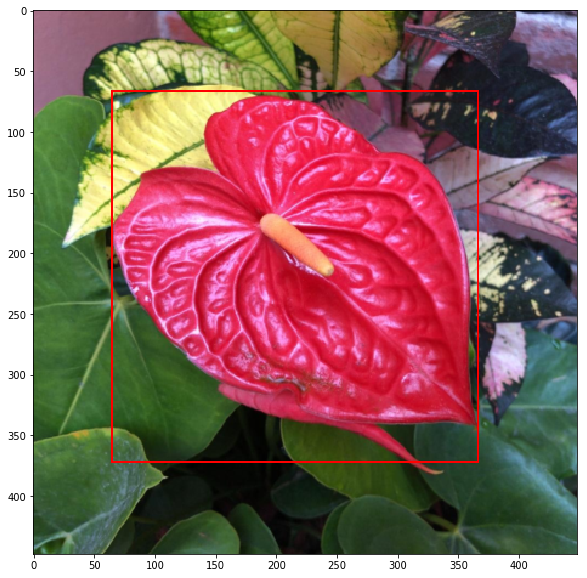

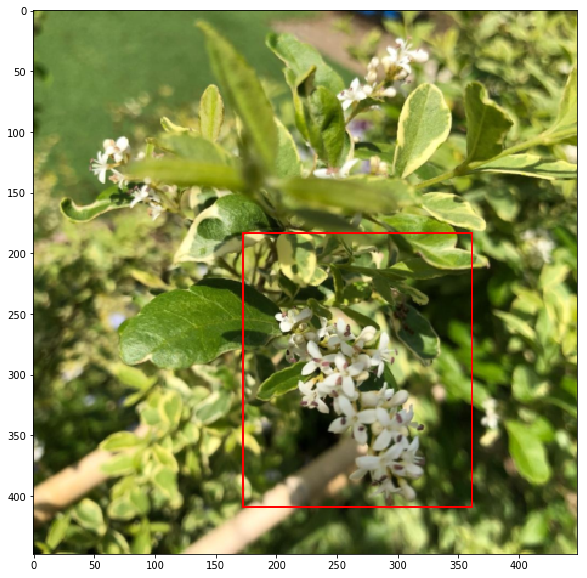

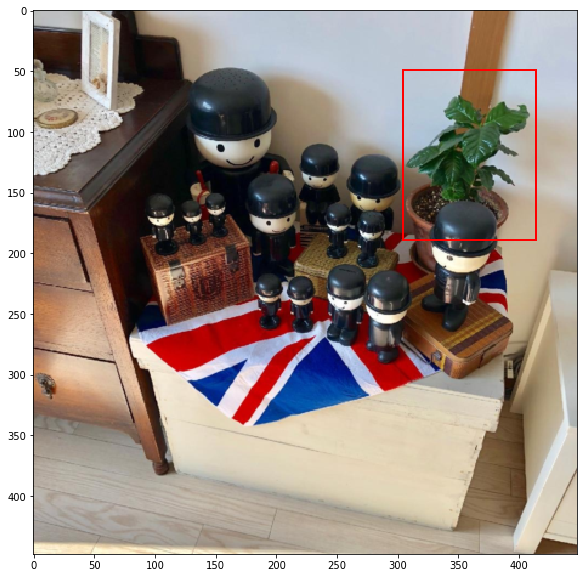

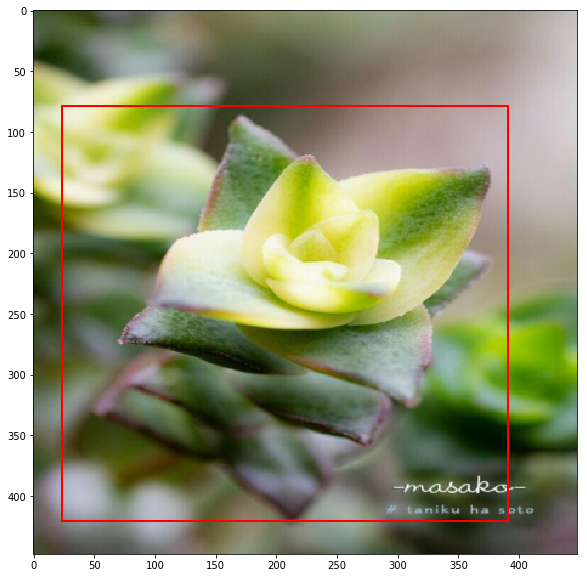

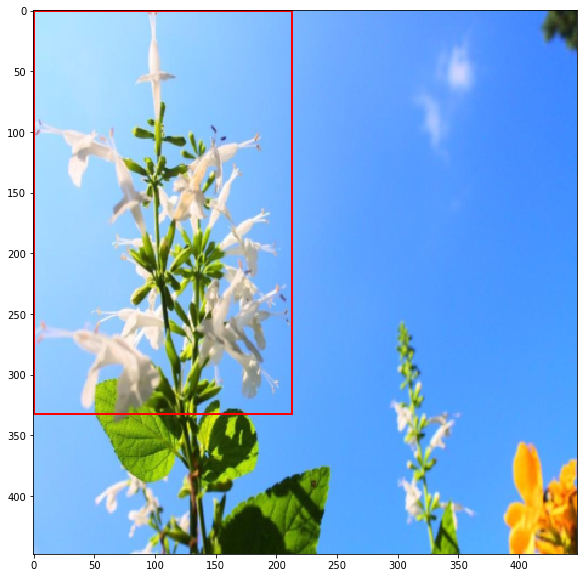

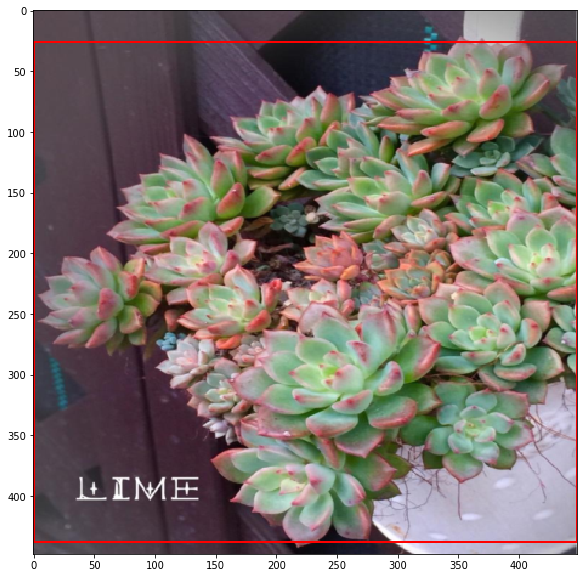

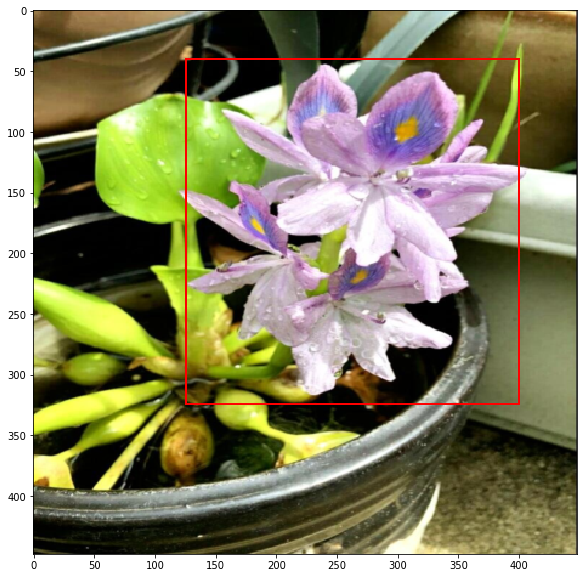

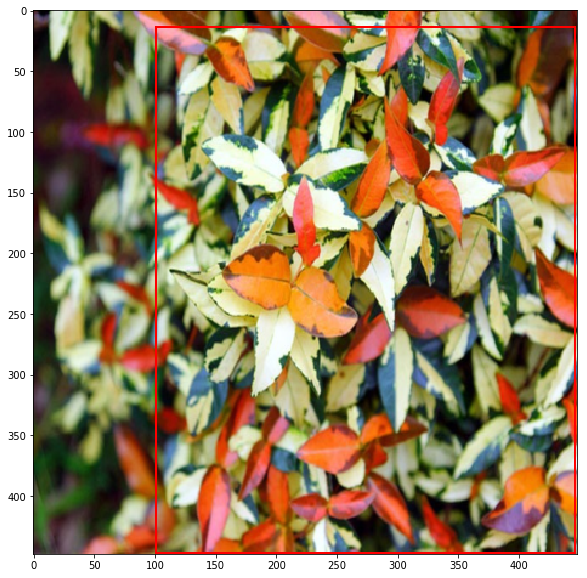

In [7]:
for step, blobs in enumerate(train_data_loader):
    if step > 10:
        break
    batch_tensor, batch_boxes, detectors_mask, matching_true_boxes, im_info, img_names = blobs
#     print(matching_true_boxes[:,:, 4:, ].shape)
#     print(matching_true_boxes[:,:, 4:, ].argmax(dim=2))
#     print(detectors_mask)
    
    for k in range(batch_tensor.shape[0]):
        current_im_info = im_info[0]
        tmp = batch_boxes[k] * torch.Tensor([current_im_info[0], current_im_info[1], current_im_info[0], current_im_info[1], 1])
        tmp = tmp.numpy()        
        between = tmp[:, 2:4] / 2        
        xy = tmp[:, :2]
        xy_min = xy - between
        xy_max = xy + between
        imshow(batch_tensor[k], gt_boxes=np.hstack((xy_min, xy_max)))    